## 4. Evaluation Metrics for Classification

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [2]:
data = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv"

In [3]:
!wget $data -O data-week-4.csv

--2025-09-10 00:36:01--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘data-week-4.csv’

data-week-4.csv     100%[===================>] 954.59K  --.-KB/s    in 0.04s   

2025-09-10 00:36:01 (26.2 MB/s) - ‘data-week-4.csv’ saved [977501/977501]



In [4]:
df = pd.read_csv('data-week-4.csv')

### 4.1  Initial Data Preparation

In [5]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
len(df)

7043

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.TotalCharges = df.TotalCharges.fillna(0)

In [9]:
pd.to_numeric?

Signature:
pd.to_numeric(
    arg,
    errors: 'DateTimeErrorChoices' = 'raise',
    downcast: "Literal['integer', 'signed', 'unsigned', 'float'] | None" = None,
    dtype_backend: 'DtypeBackend | lib.NoDefault' = <no_default>,
)
Docstring:
Convert argument to a numeric type.

The default return dtype is `float64` or `int64`
depending on the data supplied. Use the `downcast` parameter
to obtain other dtypes.

Please note that precision loss may occur if really large numbers
are passed in. Due to the internal limitations of `ndarray`, if
numbers smaller than `-9223372036854775808` (np.iinfo(np.int64).min)
or larger than `18446744073709551615` (np.iinfo(np.uint64).max) are
passed in, it is very likely they will be converted to float so that
they can be stored in an `ndarray`. These warnings apply similarly to
`Series` since it internally leverages `ndarray`.

Parameters
----------
arg : scalar, list, tuple, 1-d array, or Series
    Argument to be converted.
errors : {'ignore', 'raise', '

In [10]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [11]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

In [12]:
categorical_columns

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'churn']

In [13]:
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [14]:
df.churn = (df.churn == 'yes').astype(int)

In [15]:
df.churn.unique()

array([0, 1])

In [16]:
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

In [17]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [18]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [19]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [20]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

In [21]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']
 
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [22]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [23]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [24]:
y_pred = model.predict_proba(X_val)[:,1]
churn_decision = (y_pred >=0.5)
(y_val == churn_decision).mean()

np.float64(0.801277501774308)

### 4.2 Accuracy and Dummy model

*Accuracy* measures the fraction of correct predictions made by the model.

In [25]:
len(y_val)

1409

In [26]:
(y_val == churn_decision).sum()

np.int64(1129)

In [27]:
1129/1409 ## Reverification

0.801277501774308

In [28]:
thresholds = np.linspace(0, 1, 21)
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [29]:
scores = []

for t in thresholds:
    churn_decision = (y_pred >= t)
    score = (y_val == churn_decision).mean()
    print("%.2f %.3f" % (t,score))
    scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.598
0.15 0.664
0.20 0.707
0.25 0.737
0.30 0.759
0.35 0.766
0.40 0.780
0.45 0.793
0.50 0.801
0.55 0.798
0.60 0.797
0.65 0.784
0.70 0.765
0.75 0.744
0.80 0.730
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


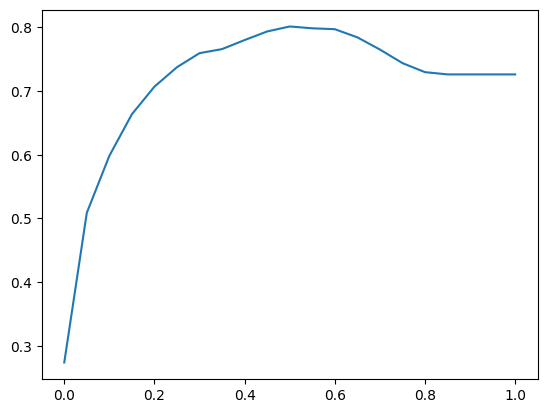

In [30]:
plt.plot(thresholds, scores)

In [31]:
# Inbuilt library for score computation
from sklearn.metrics import accuracy_score

In [32]:
churn_decision = (y_pred >=0.5)

accuracy_score(y_val, churn_decision)

0.801277501774308

In [33]:
scores = []

for t in thresholds:
    churn_decision = (y_pred >= t)
    score = accuracy_score(y_val, y_pred >= t)
    print("%.2f %.3f" % (t,score))
    scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.598
0.15 0.664
0.20 0.707
0.25 0.737
0.30 0.759
0.35 0.766
0.40 0.780
0.45 0.793
0.50 0.801
0.55 0.798
0.60 0.797
0.65 0.784
0.70 0.765
0.75 0.744
0.80 0.730
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


In [34]:
from collections import Counter

In [35]:
Counter (y_pred >= 1.0)

Counter({np.False_: 1409})

In [36]:
Counter(y_val)

Counter({np.int64(0): 1023, np.int64(1): 386})

In [37]:
y_val.mean()

np.float64(0.2739531582682754)

In [38]:
1- y_val.mean()

np.float64(0.7260468417317246)

There is Class Imbalance
 accuracy can not tell us how good is the model because the dataset is unbalanced, which means that there are more instances from one category than the other. This is also known as class imbalance.

 Classes and methods:

- np.linspace(x,y,z) - returns a numpy array starting at x until y with z evenly spaced samples
- Counter(x) - collection class that counts the number of instances that satisfy the x condition
- accuracy_score(x, y) - sklearn.metrics class for calculating the accuracy of a model, given a predicted x dataset and a target y dataset.

### 4.3 Confusion table

In [39]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)


In [40]:
actual_positive

array([False, False, False, ..., False,  True,  True], shape=(1409,))

In [41]:
actual_negative

array([ True,  True,  True, ...,  True, False, False], shape=(1409,))

In [42]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)


In [43]:
predict_positive

array([False, False, False, ..., False,  True,  True], shape=(1409,))

In [44]:
(predict_positive & actual_positive).sum()

np.int64(214)

In [45]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

In [46]:
print("TP:%s TN:%s" %(tp, tn))

TP:214 TN:915


In [47]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [48]:
print("FP:%s FN:%s" %(fp, fn)) 

FP:108 FN:172


In [49]:
confusion_matrix = np.array ([
    [tn, fp],
    [fn, tp]
]);
confusion_matrix

array([[915, 108],
       [172, 214]])

In [50]:
# Normalize the matrix
(confusion_matrix / confusion_matrix.sum())

array([[0.64939674, 0.07665011],
       [0.12207239, 0.15188077]])

In [51]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.65, 0.08],
       [0.12, 0.15]])

### 4.4 Precision and Recall

In [52]:
# Accuracy
(tp + tn)/(tp + fp + tn + fn)

np.float64(0.801277501774308)

In [53]:
# Precision: Fraction of Correct True Positive (Fraction of Correct Positive Predictions)
# Useful when cost of false positives is high
p  = tp / (tp + fp)
p

np.float64(0.6645962732919255)

In [54]:
#  Recall: Fraction of correctly identified positives
# Useful when cost of false negatives is high
r = tp / (tp + fn)
r

np.float64(0.5544041450777202)

*Precision* focuses on the accuracy of positive predictions, while *recall* emphasizes the model’s ability to capture all positive cases.

### 4.5 ROC Curves

ROC (Receiver Operating Characteristic) curves are a valuable tool for evaluating binary classification models, especially in scenarios where you want to assess the trade-off between false positives and true positives at different decision thresholds.

#### TPR and FPR
*TPR* (Sensitivity) is the fraction of true positives (TP) divided by the total number of positives.

*FPR* is the fraction of false positives (FP) divided by the total number of negatives 

Note: TPR is same as recall.

In [55]:
tpr = tp/(tp + fn)
tpr

np.float64(0.5544041450777202)

In [56]:
fpr = fp/(fp + tn)
fpr

np.float64(0.10557184750733138)

In [57]:
scores = []

actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (actual_positive & predict_positive).sum()
    fp = (actual_negative & predict_positive).sum()
    tn = (actual_negative & predict_negative).sum()
    fn = (actual_positive & predict_negative).sum()

    scores.append((t, tp, fp, fn, tn))

In [58]:
scores[:10]

[(np.float64(0.0), np.int64(386), np.int64(1023), np.int64(0), np.int64(0)),
 (np.float64(0.01), np.int64(385), np.int64(903), np.int64(1), np.int64(120)),
 (np.float64(0.02), np.int64(384), np.int64(812), np.int64(2), np.int64(211)),
 (np.float64(0.03), np.int64(382), np.int64(753), np.int64(4), np.int64(270)),
 (np.float64(0.04), np.int64(380), np.int64(708), np.int64(6), np.int64(315)),
 (np.float64(0.05), np.int64(378), np.int64(684), np.int64(8), np.int64(339)),
 (np.float64(0.06), np.int64(376), np.int64(660), np.int64(10), np.int64(363)),
 (np.float64(0.07), np.int64(374), np.int64(631), np.int64(12), np.int64(392)),
 (np.float64(0.08), np.int64(371), np.int64(601), np.int64(15), np.int64(422)),
 (np.float64(0.09), np.int64(369), np.int64(569), np.int64(17), np.int64(454))]

In [59]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores,columns=columns)
df_scores

,threshold,tp,fp,fn,tn
0,0.00,386,1023,0,0
1,0.01,385,903,1,120
2,0.02,384,812,2,211
3,0.03,382,753,4,270
4,0.04,380,708,6,315
...,...,...,...,...,...
96,0.96,0,0,386,1023
97,0.97,0,0,386,1023
98,0.98,0,0,386,1023
99,0.99,0,0,386,1023


In [60]:
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,386,1023,0,0
10,0.1,367,547,19,476
20,0.2,334,361,52,662
30,0.3,291,244,95,779
40,0.4,253,177,133,846
50,0.5,214,108,172,915
60,0.6,153,53,233,970
70,0.7,69,14,317,1009
80,0.8,5,0,381,1023
90,0.9,0,0,386,1023


In [61]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [62]:
df_scores

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.00,386,1023,0,0,1.000000,1.000000
1,0.01,385,903,1,120,0.997409,0.882698
2,0.02,384,812,2,211,0.994819,0.793744
3,0.03,382,753,4,270,0.989637,0.736070
4,0.04,380,708,6,315,0.984456,0.692082
...,...,...,...,...,...,...,...
96,0.96,0,0,386,1023,0.000000,0.000000
97,0.97,0,0,386,1023,0.000000,0.000000
98,0.98,0,0,386,1023,0.000000,0.000000
99,0.99,0,0,386,1023,0.000000,0.000000


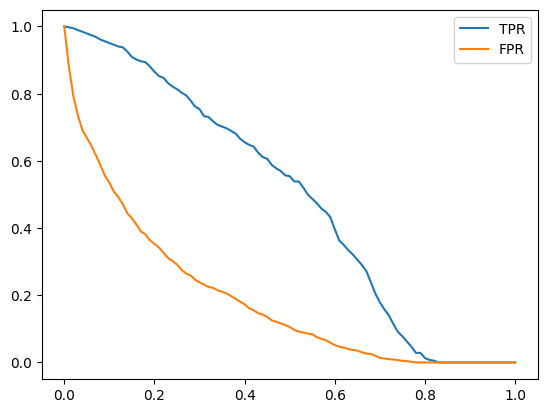

In [63]:
plt.plot(df_scores.threshold, df_scores.tpr, label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, label='FPR')
plt.legend(loc='best')

#### Random Model

In [64]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))
y_rand.round(3)

array([0.417, 0.72 , 0.   , ..., 0.774, 0.334, 0.089], shape=(1409,))

In [65]:
(y_rand >= 0.5).mean()

np.float64(0.511000709723208)

In [66]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []
    thresholds = np.linspace(0, 1, 101)

    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    for t in thresholds:
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        fp = (predict_positive & actual_negative).sum()
        tn = (predict_negative & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, tn, fp, fn))
    columns = ['threshold', 'tp', 'tn', 'fp', 'fn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn )
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn )

    return df_scores

In [67]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)
df_rand[::10]

,threshold,tp,tn,fp,fn,tpr,fpr
0,0.0,386,0,1023,0,1.000000,1.000000
10,0.1,347,100,923,39,0.898964,0.902248
20,0.2,307,201,822,79,0.795337,0.803519
30,0.3,276,299,724,110,0.715026,0.707722
40,0.4,237,399,624,149,0.613990,0.609971
50,0.5,202,505,518,184,0.523316,0.506354
60,0.6,161,614,409,225,0.417098,0.399804
70,0.7,121,721,302,265,0.313472,0.295210
80,0.8,78,817,206,308,0.202073,0.201369
90,0.9,40,922,101,346,0.103627,0.098729


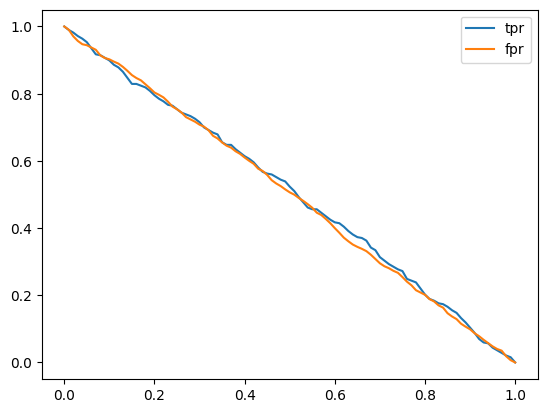

In [68]:
plt.plot(df_rand.threshold, df_rand['tpr'], label='tpr')
plt.plot(df_rand.threshold, df_rand['fpr'], label='fpr')
plt.legend()

#### Ideal Model

In [69]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(np.int64(1023), np.int64(386))

In [70]:
y_ideal = np.repeat([0,1],[num_neg, num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1], shape=(1409,))

In [71]:
y_ideal_pred = np.linspace(0, 1, len(y_val))
y_ideal_pred

array([0.00000000e+00, 7.10227273e-04, 1.42045455e-03, ...,
       9.98579545e-01, 9.99289773e-01, 1.00000000e+00], shape=(1409,))

In [72]:
1 - y_val.mean() # Fraction of 0s

np.float64(0.7260468417317246)

In [73]:
((y_ideal_pred >= 0.726) == y_ideal).mean()

np.float64(1.0)

In [74]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)
df_ideal[::10]

,threshold,tp,tn,fp,fn,tpr,fpr
0,0.0,386,0,1023,0,1.000000,1.000000
10,0.1,386,141,882,0,1.000000,0.862170
20,0.2,386,282,741,0,1.000000,0.724340
30,0.3,386,423,600,0,1.000000,0.586510
40,0.4,386,564,459,0,1.000000,0.448680
50,0.5,386,704,319,0,1.000000,0.311828
60,0.6,386,845,178,0,1.000000,0.173998
70,0.7,386,986,37,0,1.000000,0.036168
80,0.8,282,1023,0,104,0.730570,0.000000
90,0.9,141,1023,0,245,0.365285,0.000000


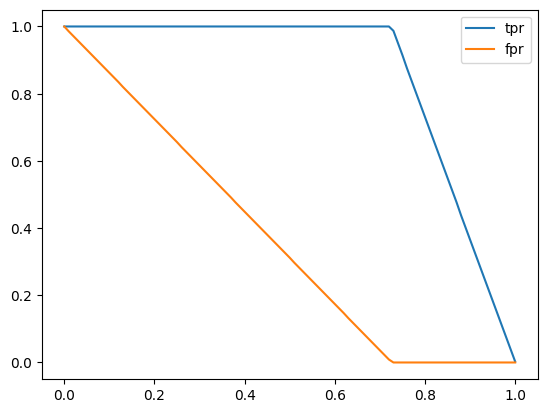

In [75]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='tpr')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='fpr')
plt.legend()

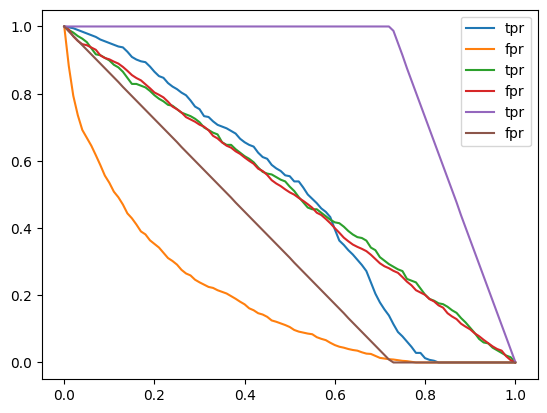

In [76]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='tpr')
plt.plot(df_scores.threshold, df_scores['fpr'], label='fpr')

plt.plot(df_rand.threshold, df_rand['tpr'], label='tpr')
plt.plot(df_rand.threshold, df_rand['fpr'], label='fpr')

plt.plot(df_ideal.threshold, df_ideal['tpr'], label='tpr')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='fpr')
plt.legend()

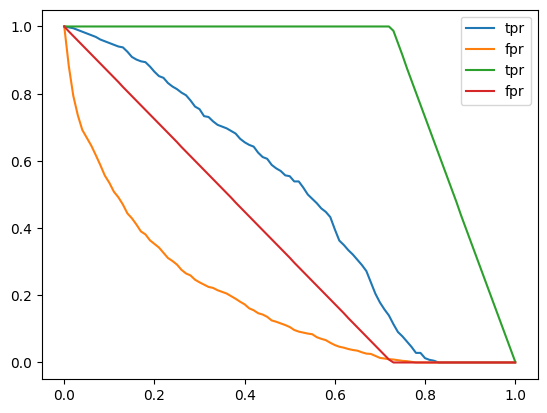

In [77]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='tpr')
plt.plot(df_scores.threshold, df_scores['fpr'], label='fpr')

plt.plot(df_ideal.threshold, df_ideal['tpr'], label='tpr')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='fpr')
plt.legend()

Text(0, 0.5, 'TPR')

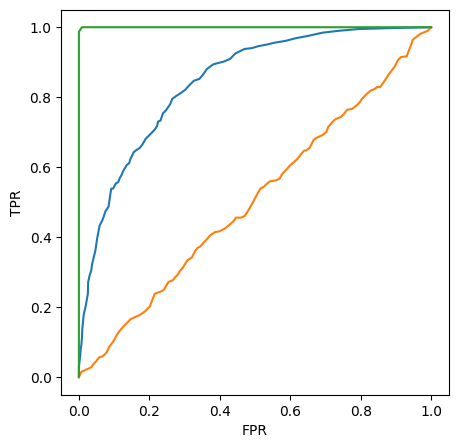

In [78]:
plt.figure(figsize=(5, 5))
plt.plot(df_scores.fpr, df_scores.tpr, label='model')
plt.plot(df_rand.fpr, df_rand.tpr, label='random')
plt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')

In [79]:
from sklearn.metrics import roc_curve

In [80]:
roc_curve(y_val, y_pred)

(array([0.        , 0.        , 0.        , 0.00195503, 0.00195503,
        0.00293255, 0.00293255, 0.00391007, 0.00391007, 0.00488759,
        0.00488759, 0.0058651 , 0.0058651 , 0.00684262, 0.00684262,
        0.00782014, 0.00782014, 0.00879765, 0.00879765, 0.00977517,
        0.00977517, 0.01075269, 0.01075269, 0.01173021, 0.01173021,
        0.01270772, 0.01270772, 0.01368524, 0.01368524, 0.01466276,
        0.01466276, 0.01759531, 0.01759531, 0.01857283, 0.01857283,
        0.01955034, 0.01955034, 0.02150538, 0.02150538, 0.02248289,
        0.02248289, 0.02443793, 0.02443793, 0.02541544, 0.02541544,
        0.02639296, 0.02639296, 0.02737048, 0.02737048, 0.03030303,
        0.03030303, 0.03128055, 0.03128055, 0.03323558, 0.03323558,
        0.03519062, 0.03519062, 0.03616813, 0.03616813, 0.03714565,
        0.03714565, 0.03812317, 0.03812317, 0.03910068, 0.03910068,
        0.04105572, 0.04105572, 0.04203324, 0.04203324, 0.04301075,
        0.04301075, 0.04398827, 0.04398827, 0.04

In [81]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

Text(0, 0.5, 'TPR')

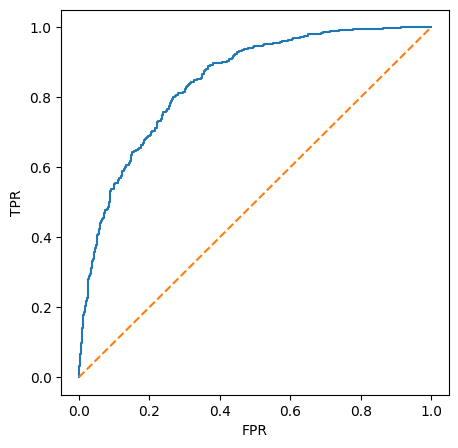

In [82]:
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label='Model')
plt.plot([0,1], [0,1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

### 4.6 ROC AUC

In [83]:
from sklearn.metrics import auc

In [84]:
auc(fpr, tpr)

0.8445038720820102

In [85]:
auc(df_scores.fpr, df_scores.tpr)

0.8443696534119398

In [86]:
auc(df_ideal.fpr, df_ideal.tpr)

0.9999430203759136

In [87]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc(fpr, tpr)

0.8445038720820102

In [88]:
from sklearn.metrics import roc_auc_score

In [90]:
# shortcut to get score
roc_auc_score(y_val, y_pred)

0.8445038720820102

In [91]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [92]:
import random

In [93]:
random.randint(0, len(neg) - 1)

505

In [95]:
pos_ind = random.randint(0, len(pos) - 1)
neg_ind = random.randint(0, len(neg) - 1)

In [96]:
pos[pos_ind] > neg[neg_ind]

np.True_